25-й перцентиль: 4.0, 75-й перцентиль: 7.0, IQR: 3.0,  Границы выбросов: [-0.5, 11.5].


,score,Pedu
score,1.00000,0.14556
Pedu,0.14556,1.00000


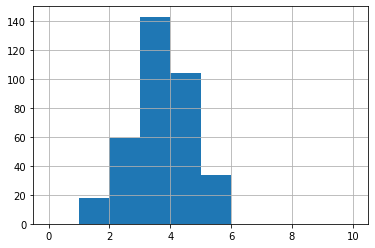

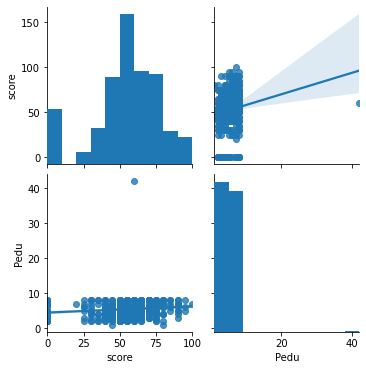

In [164]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

stud_math = pd.read_csv('stud_math.xls')

#preprocess
stud_math.activities = stud_math.activities.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                                                  else 1 if x == 'yes' else 0)
stud_math.famsup = stud_math.famsup.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                                          else 1 if x == 'yes' else 0)
stud_math.romantic = stud_math.romantic.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                                              else 1 if x == 'yes' else 0)
stud_math.higher = stud_math.higher.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                                          else 1 if x == 'yes' else 0)
stud_math.sex = stud_math.sex.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                                    else 1 if x == 'M' else 0)
# sum education of parents
stud_math['Pedu'] = stud_math.apply(lambda row: row.Medu + row.Fedu, axis=1)



#field Pedu
#Имеется выброс.
median = stud_math.Pedu.median()
IQR = stud_math.Pedu.quantile(0.75) - stud_math.Pedu.quantile(0.25)
perc25 = stud_math.Pedu.quantile(0.25)
perc75 = stud_math.Pedu.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
stud_math.freetime.loc[stud_math.Pedu.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 10), 
                                                                                         label = 'IQR')
#Зависимость балла ученика от образования родителей крайне низкая
stud_math_analys = stud_math[['score', 'Pedu']].copy()
sns.pairplot(stud_math_analys, kind = 'reg')
stud_math_analys.corr()      

#field Fjob и Mjob
stud_math.groupby(by=["Fjob"]).mean()['score']
#максимальный средний бал если отец в области teacher

stud_math.groupby(by=["Mjob"]).mean()['score']
#максимальный средний бал если отец в области health


#field school
#Больше всего людей из GP 349. MS - 46
#график показывает что зависимости между школой рейтингом нет
stud_math_analys = stud_math[['school', 'score']].copy()
stud_math_analys.school = stud_math_analys.school.apply(lambda x: 1 if x.strip() == 'GP' else 0)
sns.pairplot(stud_math_analys, kind = 'reg')

#field score
#Анализ баллов говорит о том, что нет выбросов 
median = stud_math.score.median()
IQR = stud_math.score.quantile(0.75) - stud_math.score.quantile(0.25)
perc25 = stud_math.score.quantile(0.25)
perc75 = stud_math.score.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

stud_math.score.loc[stud_math.score.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 16
                                                                                              , range = (40, 100), 
                                                                                             label = 'IQR')

plt.legend();


#field Health текущее состояние здоровья
#Выбросов нет
stud_math.health

stud_math.health.hist()
stud_math.health.describe()

median = stud_math.health.median()
IQR = stud_math.health.quantile(0.75) - stud_math.health.quantile(0.25)
perc25 = stud_math.health.quantile(0.25)
perc75 = stud_math.health.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
stud_math.health.loc[stud_math.health.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 10), 
                                                                                             label = 'IQR')
plt.legend();

#связи с баллом по экзамену нет.
stud_math_analys = stud_math[['score', 'health']].copy()
sns.pairplot(stud_math_analys, kind = 'reg')

stud_math_analys.corr()


#field Good:
#выбросов нет.

stud_math.goout

stud_math.goout.hist()
stud_math.goout.describe()

median = stud_math.goout.median()
IQR = stud_math.goout.quantile(0.75) - stud_math.goout.quantile(0.25)
perc25 = stud_math.goout.quantile(0.25)
perc75 = stud_math.goout.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
stud_math.goout.loc[stud_math.goout.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 10), 
                                                                                             label = 'IQR')
plt.legend();


#связи с баллом по экзамену нет.
stud_math.goout.hist()
stud_math.goout.describe()

stud_math_analys = stud_math[['score', 'goout']].copy()
sns.pairplot(stud_math_analys, kind = 'reg')

stud_math_analys.corr()


#freetime:

#Имеются выбросы
stud_math.freetime.hist()
stud_math.freetime.describe()

median = stud_math.freetime.median()
IQR = stud_math.freetime.quantile(0.75) - stud_math.freetime.quantile(0.25)
perc25 = stud_math.freetime.quantile(0.25)
perc75 = stud_math.freetime.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
stud_math.freetime.loc[stud_math.freetime.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 10), 
                                                                                             label = 'IQR')
plt.legend();

#field famrel
#Выбросы имеются. 

#field activities
#зависимостей нет.


#Поля internet и higher, nursery практически у всех "Да".

# Field Sex:
stud_math.groupby(by=["sex"]).mean()['score']
#Мальчики имеют средний бал выше чем девочки
#мальичики которые выбрали школу по престижу получили высокий средний бал.

stud_math.groupby(by=["sex", "reason"]).agg(['mean', 'count'])
#больше всего людей выбираюn школу по образовательной программе

stud_math.groupby(by=["Medu"]).agg(['mean', 'count'])
#У большинства людей отец имеет образование 2, мать 4

#Ученики, которые тратят время 5-10 часов получили лучший результат по экзамену.



#Выводы:
#Зависимость результатов экзамена ученика от образования родителей крайне низкая. 
#Вообще, зависимости баллов по госэкзамену к какому-лиюо параметру не найдено.
#Ученики, которые тратят 5-10 часов время на учебу получили лучший результат по экзамену.
#У большинства людей отец имеет образование 5-9 классов, мать -высшее
#Больше всего людей выбираюn школу по образовательной программе
#Мальчики имеют средний бал выше чем девочки
#Мальичики, которые выбрали школу по престижу, получили высокий средний бал.
#Максимальный средний бал тех учеников у которых отец работает в области teacher
#Максимальный средний бал тех учеников у которых мать работает в области health